In [1]:
# Source: https://github.com/ishaberry/Covid19Canada
# Source: https://resources-covid19canada.hub.arcgis.com/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Covid Confirmed Cases
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file = '05-10-2020.csv'
today = '05-10-2020'
today = pd.to_datetime(today, format = "%m-%d-%Y")

df = pd.read_csv(url+file)

# Summary by province
df_prov = pd.read_csv('data/canada/Cases (Province).csv')
df_prov

# Testing Numbers
path = 'data/Covid19Canada/'
df_testing = pd.read_csv(path + 'testing_cumulative.csv')
#Formating Dates, Sorting Values and Selecting Fields
df_testing['date_testing'] = pd.to_datetime(df_testing['date_testing'], format = "%d-%m-%Y")
df_testing.sort_values(['province','date_testing'], ascending=True, inplace = True)
df_testing.reset_index(inplace=True)
df_testing = df_testing[['date_testing', 'province', 'cumulative_testing']]

In [2]:
can = df[df['Country_Region'] == 'Canada'].sort_values('Confirmed', ascending=False)
can[['Province_State', 'Confirmed']]

,Province_State,Confirmed
3024,Quebec,37732
3020,Ontario,21469
2962,Alberta,6253
2970,British Columbia,2330
3019,Nova Scotia,1018
3031,Saskatchewan,564
3007,Manitoba,287
3014,Newfoundland and Labrador,261
3011,New Brunswick,120
3021,Prince Edward Island,27


# Overview

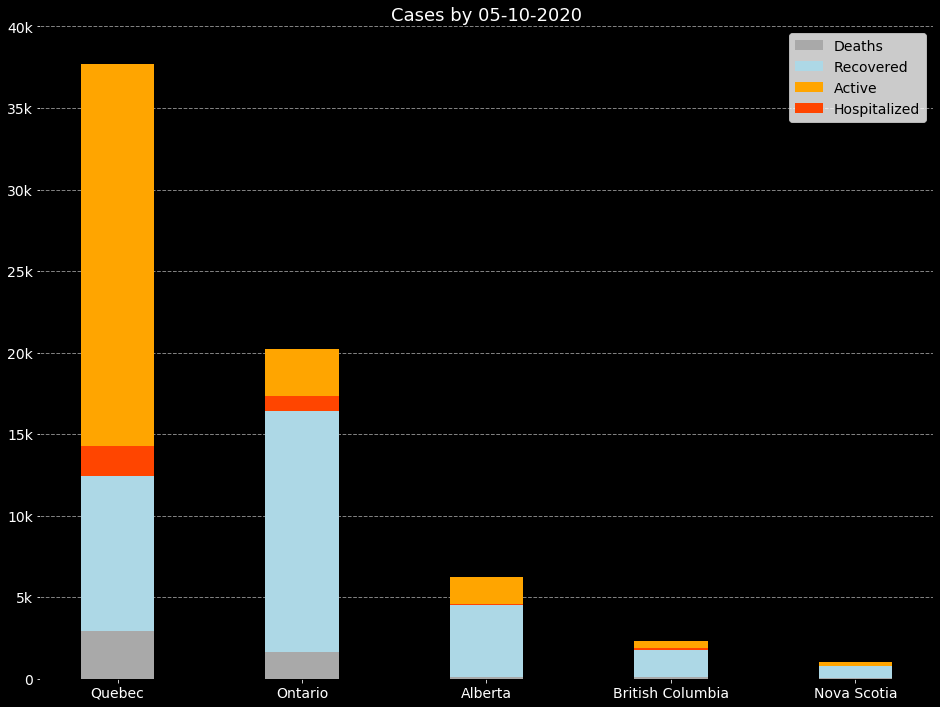

In [3]:
# Adjust Dataframe
provinces = ['Quebec', 'Ontario', 'British Columbia', 
             'Alberta', 'Nova Scotia']
can = df_prov[df_prov['NAME'].isin(provinces)].sort_values('Cases', ascending=False)
# Create figure
fig, ax = plt.subplots(1, figsize=(16,12), facecolor='black')

# Plot
# Deaths
plt.bar(x=can['NAME'], height=can['Deaths'], 
        width=0.4, color='darkgrey')
# Recoveries
plt.bar(x=can['NAME'], height=can['Recovered'], 
        width=0.4, color='lightblue', 
        bottom = can['Deaths'])
# Active
plt.bar(x=can['NAME'], height=can['Active Cases'], 
        width=0.4, color='orange',
        bottom = can['Deaths'] + can['Recovered'])
# Hospitalized
plt.bar(x=can['NAME'], height=can['Hospitalized'], 
        width=0.4, color='orangered', bottom = can['Deaths'] + can['Recovered'])

# Details (ticks, legend, title, labels)
plt.xticks(fontsize=14)
yticks = np.arange(0,40001,5000)
yticks_label =['0']+[str(i)[:-3] + 'k' for i in yticks[1:]]
plt.yticks(yticks, labels = yticks_label, fontsize=14)
plt.legend(['Deaths', 'Recovered', 'Active', 'Hospitalized'], fontsize = 14)
plt.title('Cases by ' + file[:10], color='white', fontsize=18)

# Grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Save
plt.savefig('img/overview_canada.png', facecolor='black', edgecolor='none')

# Testing

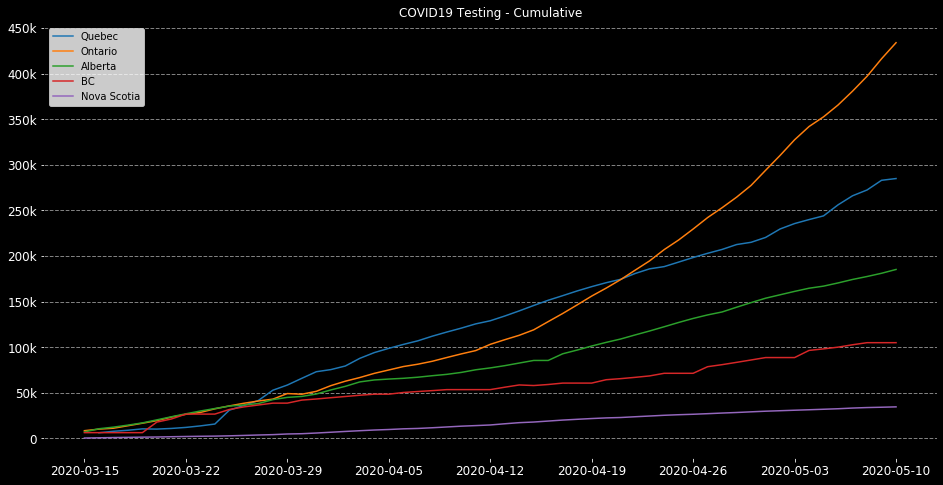

In [4]:
provinces = ['Quebec', 'Ontario', 'Alberta', 'BC', 'Nova Scotia']

fig, ax = plt.subplots(1, figsize=(16,8), facecolor = 'black')

# plots
for province in provinces:
    temp = df_testing[df_testing.province == province]
    plt.plot(temp['date_testing'], temp['cumulative_testing'])

#Details
plt.xticks(temp['date_testing'].values[::-7], fontsize=12)
yticks = np.arange(0, 450001, 50000)
yticks_label =[0]+[str(i)[:-3] + 'k' for i in yticks[1:]]
plt.yticks(yticks, fontsize = 12, labels = yticks_label)
plt.legend(provinces)
plt.title('COVID19 Testing - Cumulative', color='white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.savefig('img/testing_canada.png', facecolor='black', edgecolor='none')

# Population Distribution by Age

In [5]:
# Prepare new dataframe
df_age = df_prov[['NAME', '2019 Total Pop 0 to 4 Yrs',
        '2019 Total Pop 5 to 9 Yrs', '2019 Total Pop 10 to 14 Yrs',
        '2019 Total Pop 15 to 19 Yrs', '2019 Total Pop 20 to 24 Yrs',
        '2019 Total Pop 25 to 29 Yrs', '2019 Total Pop 30 to 34 Yrs',
        '2019 Total Pop 35 to 39 Yrs', '2019 Total Pop 40 to 44 Yrs',
        '2019 Total Pop 45 to 49 Yrs', '2019 Total Pop 50 to 54 Yrs',
        '2019 Total Pop 55 to 59 Yrs', '2019 Total Pop 60 to 64 Yrs',
        '2019 Total Pop 65 to 69 Yrs', '2019 Total Pop 70 to 74 Yrs',
        '2019 Total Pop 75 to 79 Yrs', '2019 Total Pop 80 to 84 Yrs',
        '2019 Total Pop 85 or Older']].dropna().copy()
# Rename columns
df_age.columns = ['NAME', '0 to 4', '5 to 9', '10 to 14', '15 to 19', 
                '20 to 24', '25 to 29', '30 to 34', '35 to 39',
                '40 to 44', '45 to 49', '50 to 54', '55 to 59',
                '60 to 64', '65 to 69', '70 to 74', '75 to 79',
                '80 to 84', '85 or older']
df_age

,NAME,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80 to 84,85 or older
0,Alberta,283460.0,275062.0,263508.0,244291.0,274870.0,335040.0,372040.0,371608.0,321058.0,288398.0,272779.0,291515.0,262841.0,200075.0,148958.0,96811.0,65169.0,68156.0
1,British Columbia,227890.0,235572.0,240006.0,254983.0,323378.0,338603.0,342000.0,340131.0,313387.0,321154.0,328861.0,357360.0,335841.0,291567.0,242964.0,167928.0,113708.0,119821.0
2,Manitoba,87963.0,85902.0,83607.0,85122.0,95712.0,99468.0,98689.0,92593.0,85601.0,82379.0,82551.0,91093.0,81381.0,68626.0,55244.0,37256.0,25796.0,28828.0
3,New Brunswick,33897.0,37318.0,38726.0,39828.0,42149.0,44267.0,41936.0,45040.0,46815.0,50415.0,54352.0,61496.0,58605.0,51204.0,43432.0,28743.0,18645.0,19192.0
4,Newfoundland and Labrador,21854.0,24726.0,26686.0,26568.0,27863.0,30913.0,31007.0,32196.0,32048.0,36036.0,40689.0,41752.0,40628.0,37900.0,30791.0,19393.0,12232.0,9959.0
5,Northwest Territories,3013.0,3162.0,3289.0,2413.0,3049.0,3663.0,3721.0,3561.0,3237.0,2773.0,2856.0,3342.0,2416.0,1579.0,838.0,568.0,339.0,259.0
6,Nova Scotia,42803.0,45243.0,45823.0,48835.0,58642.0,63416.0,60786.0,58671.0,57698.0,61403.0,66079.0,77221.0,73300.0,63324.0,54257.0,35913.0,22692.0,22606.0
7,Ontario,737841.0,749591.0,768965.0,795889.0,980205.0,1060688.0,1007244.0,969152.0,923417.0,937475.0,993284.0,1076876.0,944917.0,785087.0,650875.0,448937.0,315169.0,333817.0
8,Prince Edward Island,6906.0,7549.0,7885.0,7613.0,8462.0,8431.0,7503.0,8245.0,7914.0,8963.0,9679.0,10377.0,9648.0,8517.0,7605.0,4737.0,3026.0,2789.0
9,Quebec,427294.0,459270.0,437395.0,407413.0,483987.0,573828.0,548439.0,589315.0,572674.0,521774.0,558829.0,630832.0,601270.0,507750.0,426914.0,301441.0,196460.0,213165.0


In [6]:
# function to plot age distribution. input - name of province
def pop_age(name):
    df_test = df_age[df_age['NAME'] == name]
    df_test.set_index('NAME', inplace=True)
    df_test = df_test.T

    df_test.reset_index(inplace=True)
    df_test = df_test.sort_index(ascending=False)

    total = df_test.sum()[name]

    plt.barh(df_test['index'], df_test[name]/total * 100)
    
    #details
    plt.title(name + ' - Age Distribution', fontsize=16, color='white')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('%', color='white', fontsize=18)
    
    # grid
    ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'x')
    ax.set_axisbelow(True)

    # remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #Colors
    ax.set_facecolor('xkcd:black')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    
    
def pop_age2(name):
    df_test = df_age[df_age['NAME'] == name]
    df_test.set_index('NAME', inplace=True)
    df_test = df_test.T

    a = df_test[name].values[::2]
    b = df_test[name].values[1::2]

    df_age2 = pd.DataFrame(['0-9', '10-19', '20-29', '30-39',
                           '40-49', '50-59', '60-69', '70-79',
                           '80 or more'])

    df_age2['pop'] = a+b
    df_age2.columns = ['age', 'pop']
    df_age2

    total = df_age2.sum()['pop']

    df_age2.reset_index(inplace=True)
    df_age2 = df_age2.sort_index(ascending=False)
    
    plt.barh(df_age2['age'], df_age2['pop']/total * 100)
    
    #details
    plt.title(name + ' - Age Distribution', fontsize=16, color='white')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('%', color='white', fontsize=18)
    
    # grid
    ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'x')
    ax.set_axisbelow(True)

    # remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #Colors
    ax.set_facecolor('xkcd:black')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')


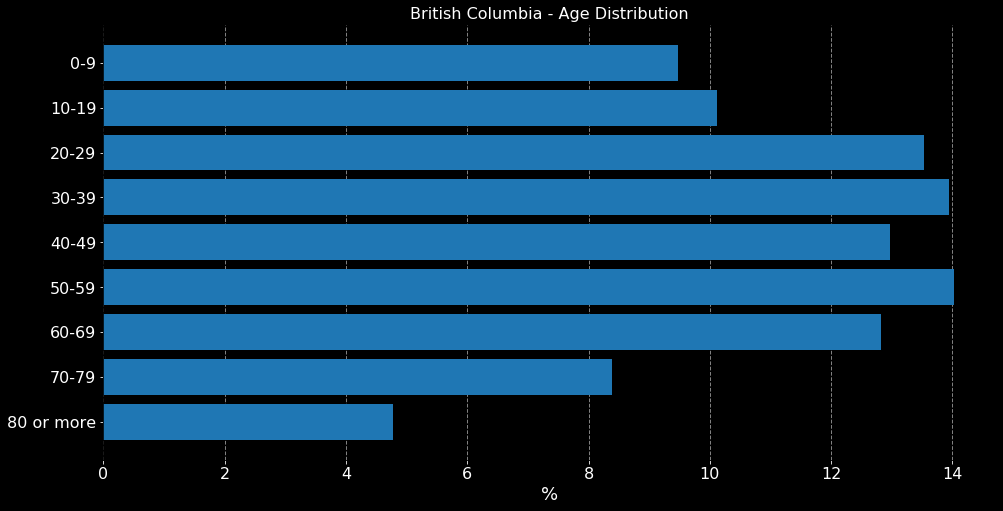

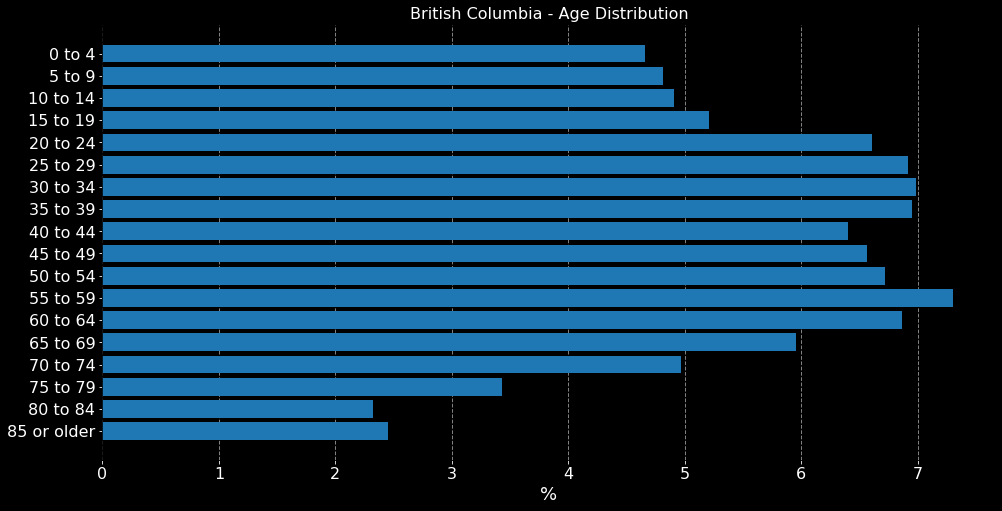

In [7]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')

pop_age2('British Columbia')

    
plt.savefig('img/bc_age.png', facecolor='black', edgecolor='none')

fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')

pop_age('British Columbia')

plt.show()

# Others

In [8]:
path = 'data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
#today = pd.to_datetime(today, format = "%m-%d-%Y")

In [9]:
recoveries = pd.read_csv('data/Covid19Canada/recovered_cumulative.csv')
#recoveries = recoveries[recoveries['province'] == 'BC'].iloc[:-40,:].sort_index(ascending=False).reset_index()
recoveries = recoveries[recoveries['province'] == 'BC'].sort_index(ascending=False).reset_index()
recoveries.tail()

,index,date_recovered,province,cumulative_recovered
84,93,06-05-2020,BC,1494.0
85,92,07-05-2020,BC,1512.0
86,91,08-05-2020,BC,1579.0
87,90,09-05-2020,BC,1659.0
88,89,10-05-2020,BC,1659.0


In [10]:
def build_df(file):

    temp = pd.read_csv(path+file)
    
    try:
        temp = temp.groupby('Province_State').sum().copy()
    except:
        temp = temp.groupby('Province/State').sum().copy()
        
    df_new = pd.DataFrame(temp.index)
    df_new.columns = ['Province_State']

    df_new['Confirmed'] = temp['Confirmed'].values
    df_new['Deaths'] = temp['Deaths'].values
    df_new['Recovered'] = temp['Recovered'].values
    df_new['Active'] = df_new['Confirmed'] - df_new['Deaths'] - df_new['Recovered']
    df_new['Date'] = [file[:10] for i in np.arange(0,len(df_new))]
    return df_new


def get_range(first_file='01-22-2020', start='01-23-2020', end=today):
    start = pd.to_datetime(start, format = "%m-%d-%Y")
    end = pd.to_datetime(end, format = "%m-%d-%Y")

    dates = pd.date_range(start= start, end=end)
    files = []

    for i in dates.strftime('%m-%d-%Y'):
        files.append(str(i)+'.csv')

    df = build_df(first_file+'.csv')

    for file in files:
        #print(file)
        new = build_df(file)
        df = df.append(new, sort=False)

    return df


In [11]:
prov = get_range('02-12-2020', '02-13-2020')

prov = prov[prov['Province_State'] == 'British Columbia']
prov['Recovered'] = recoveries['cumulative_recovered'].values
prov['Active'] = prov['Confirmed'] - prov['Deaths'] - prov['Recovered']

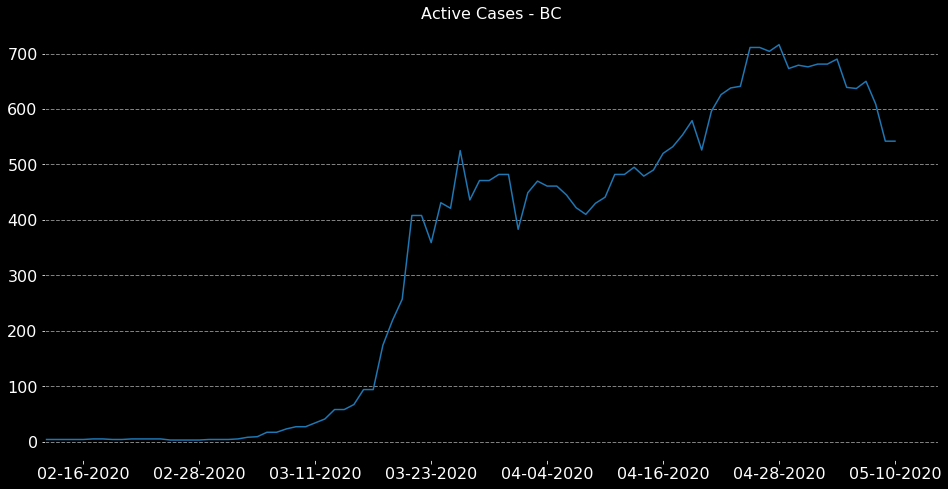

In [12]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')
x = np.arange(len(prov['Date']))
plt.plot(x, prov['Active'])

#details
plt.title('Active Cases - BC', fontsize=16, color='white')
plt.xticks(x[::-12] , prov['Date'].values[::-12], fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,)
    
# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.savefig('img/bc_active.png', facecolor='black', edgecolor='none')

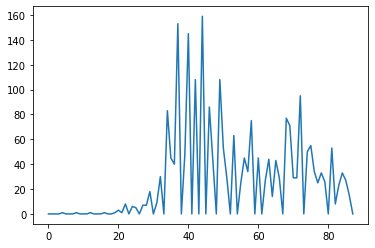

In [13]:
active = prov['Confirmed'].values
a = []
for i, val in enumerate(active[1:]):
    a.append(val - active[i])
    
plt.plot(a)

In [14]:
df_prov.columns

Index(['OBJECTID', 'NAME', 'NOM', 'Province', 'Cases', 'Recovered', 'Deaths',
       'Tests', 'Hospitalized', 'ICU', 'Last Updated', 'Active Cases',
       '2019 Total Population', '2019 Total Pop 0 to 4 Yrs',
       '2019 Total Pop 5 to 9 Yrs', '2019 Total Pop 10 to 14 Yrs',
       '2019 Total Pop 15 to 19 Yrs', '2019 Total Pop 20 to 24 Yrs',
       '2019 Total Pop 25 to 29 Yrs', '2019 Total Pop 30 to 34 Yrs',
       '2019 Total Pop 35 to 39 Yrs', '2019 Total Pop 40 to 44 Yrs',
       '2019 Total Pop 45 to 49 Yrs', '2019 Total Pop 50 to 54 Yrs',
       '2019 Total Pop 55 to 59 Yrs', '2019 Total Pop 60 to 64 Yrs',
       '2019 Total Pop 65 to 69 Yrs', '2019 Total Pop 70 to 74 Yrs',
       '2019 Total Pop 75 to 79 Yrs', '2019 Total Pop 80 to 84 Yrs',
       '2019 Total Pop 85 or Older', '2019 Total Pop Average Age',
       '2019 Total Pop Median Age', '2019 Total Pop Aggregate Age',
       'Source URL', 'x', 'y'],
      dtype='object')

In [15]:
df_prov.sort_values('Cases', ascending=False)[['NAME', 'Cases',
                                               'Recovered', 'Deaths',
                                               'Active Cases',
                                                '2019 Total Population']]

,NAME,Cases,Recovered,Deaths,Active Cases,2019 Total Population
9,Quebec,37721,9526,2928,25267,8458050.0
7,Ontario,20238,14772,1634,3832,14479429.0
0,Alberta,6253,4389,117,1747,4435639.0
1,British Columbia,2330,1659,129,542,4895154.0
6,Nova Scotia,1018,749,47,222,958712.0
11,Saskatchewan,564,349,6,209,1203446.0
2,Manitoba,287,247,7,33,1367811.0
4,Newfoundland and Labrador,261,244,3,14,523241.0
3,New Brunswick,120,118,0,2,756060.0
8,Prince Edward Island,27,27,0,0,135849.0


In [16]:
df_prov['cases_10k'] = (df_prov['Active Cases'] / df_prov['2019 Total Population']) *10000

In [17]:
df_p = df_prov.sort_values('Cases', ascending=False)[:5]

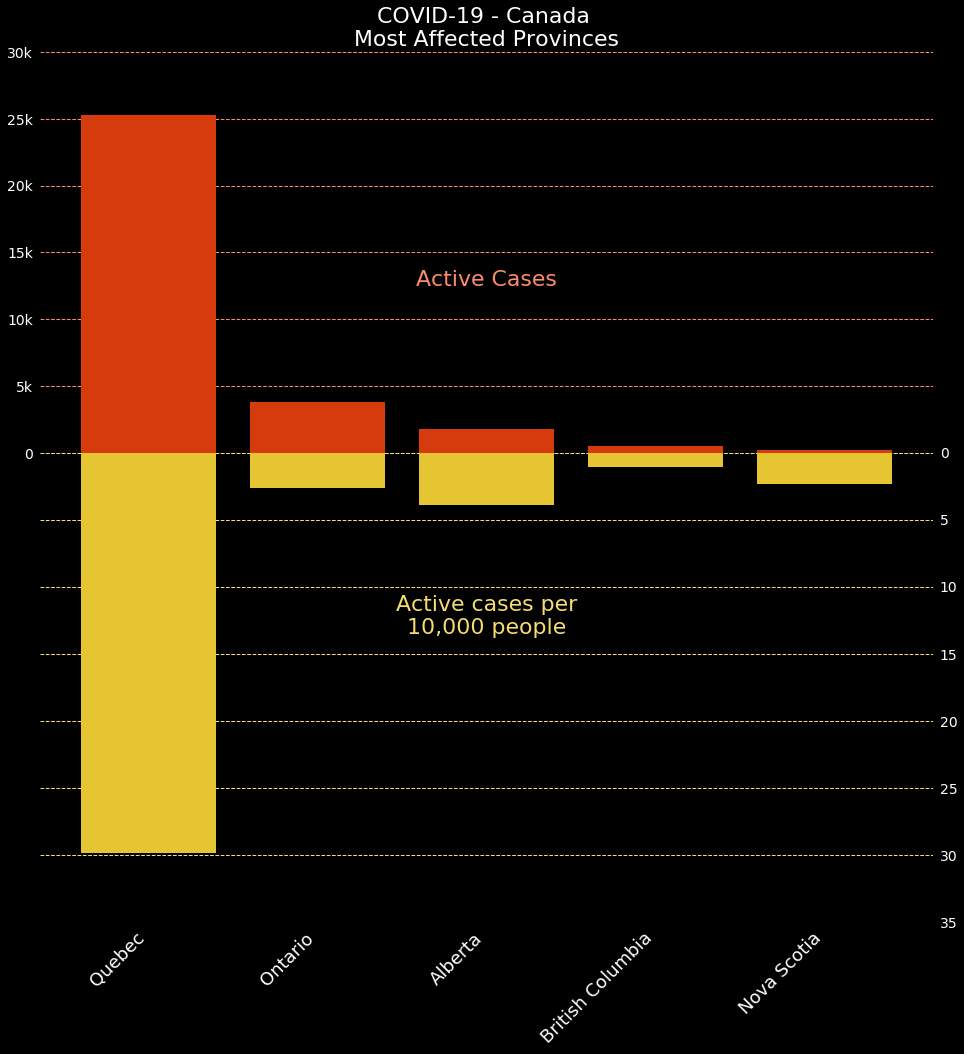

In [29]:
fig, ax1 = plt.subplots(1, figsize=(16,16), facecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=18, color='white')

ax1.bar(df_p['NAME'], df_p['Active Cases'], color='#D63B0E')
ax1.set_ylim( (df_p['Active Cases'].max()*1.39) *-1,)

yticks = np.arange(0, 30001, 5000)
yticks_label = [0]+[str(i)[:-3] + 'k' for i in yticks[1:]]

ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks_label, 
                    fontsize=14, color='white')

# grid
ax1.grid(color='#FC8D6C', linestyle='dashed', linewidth=1, axis = 'y')
ax1.set_axisbelow(True)

ax2 = ax1.twinx()
ax2.bar(df_p['NAME'], df_p['cases_10k']*-1, color='#E5C532')

ax2.set_ylim( (df_p['cases_10k'].max()) *-1 , 
             (df_p['cases_10k'].max()))

ax2.set_yticks(np.arange(0,-36, -5))
ax2.set_yticklabels(np.arange(0,-36, -5)*-1, fontsize=14, 
                    color='white')

# grid
ax2.grid(color='#F5DE70', linestyle='dashed', linewidth=1, axis = 'y')
ax2.set_axisbelow(True)

# remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
# remove spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.title('COVID-19 - Canada \nMost Affected Provinces', 
          color='white', fontsize=22)

#TEXT
ax1.text(2, 12500, 'Active Cases', color='#FC8D6C', 
         fontsize=22, ha='center')
ax2.text(2, -13.5, 'Active cases per\n10,000 people', color='#F5DE70', 
         fontsize=22, ha='center')

ax1.set_facecolor('black')
plt.savefig('img/can_rank2.png', facecolor='black', edgecolor='none')

In [19]:
df_p['cases_10k'].max()

29.873315953440805

In [20]:
[0, 5000, 10000, 15000, 20000]

[0, 5000, 10000, 15000, 20000]